In [87]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt


In [29]:
df = pd.read_csv("Data/decision.csv")

In [31]:
df

,Age,Income (USD),Purchase
0,25,50000.0,0.0
1,30,60000.0,1.0
2,35,75000.0,1.0
3,40,80000.0,0.0
4,45,90000.0,1.0
5,50,100000.0,1.0
6,55,70000.0,1.0
7,60,60000.0,0.0
8,65,50000.0,1.0
9,70,40000.0,0.0


In [33]:
df.shape

(11, 3)

In [61]:
# Remove rows with non-numeric values or NaN
df = df[pd.to_numeric(df['Age'], errors='coerce').notna()]
df = df.dropna()

# Convert to numeric
df['Age'] = pd.to_numeric(df['Age'])
df['Income (USD)'] = pd.to_numeric(df['Income (USD)'])

In [63]:
df

,Age,Income (USD),Purchase
0,25,50000.0,0.0
1,30,60000.0,1.0
2,35,75000.0,1.0
3,40,80000.0,0.0
4,45,90000.0,1.0
5,50,100000.0,1.0
6,55,70000.0,1.0
7,60,60000.0,0.0
8,65,50000.0,1.0
9,70,40000.0,0.0


In [67]:
df.isna().sum()

Age             0
Income (USD)    0
Purchase        0
dtype: int64

In [73]:

X = df[['Age', 'Income (USD)']]
y = df['Purchase']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and train the model
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

In [75]:
y_pred

array([0., 0., 1.])

In [79]:
# Evaluate the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         0
         1.0       1.00      0.33      0.50         3

    accuracy                           0.33         3
   macro avg       0.50      0.17      0.25         3
weighted avg       1.00      0.33      0.50         3



D:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


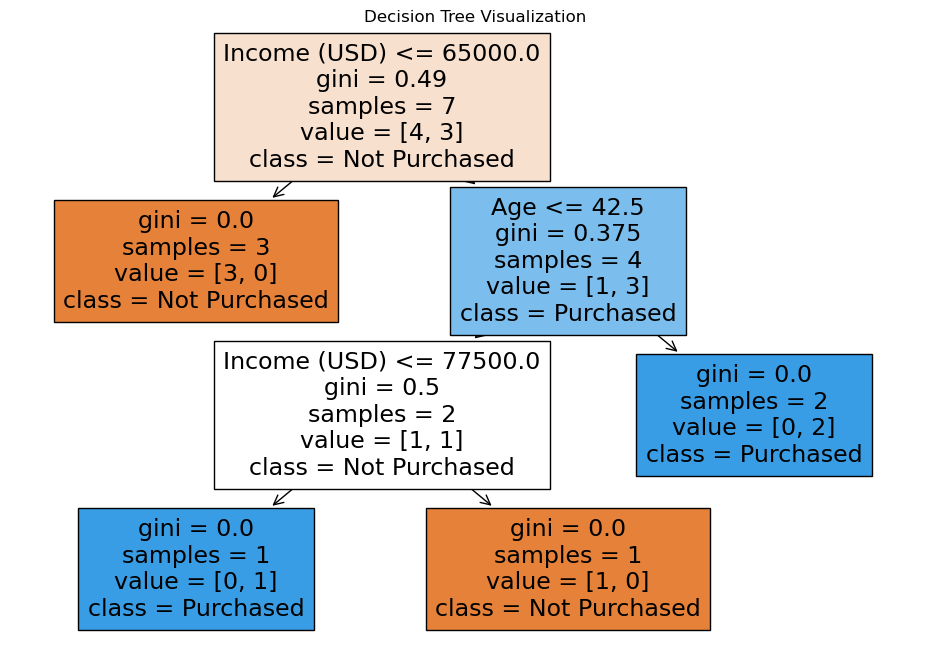

In [89]:
plt.figure(figsize=(12,8))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=['Not Purchased', 'Purchased'])
plt.title('Decision Tree Visualization')
plt.show()